### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd

## 1. Read in the dataset and look at it

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Sci Course/Module6/telco_churn_data.csv')

In [ ]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [ ]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [ ]:
#Identify missing data
df.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

## 2. Data Cleaning

In [ ]:
#Drop variables that do not contribute useful info
df_reduced = df.drop(['Customer ID', 'Zip Code', 'Latitude', 'Longitude', 'City', 'Population', 'Churn Value', 'CLTV', 'Churn Reason'], axis=1)
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   object 
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              3166 non-null   object 
 4   Phone Service                      7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Internet Type                      5517 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

In [ ]:
#Fill in missing values
df_reduced['Offer'].fillna(value='None', inplace=True)
df_reduced['Internet Type'].fillna(value='None', inplace=True)
df_reduced['Churn Category'].fillna(value='None', inplace=True)
df_reduced['Customer Satisfaction'].fillna(value='None', inplace=True)
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   object 
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              7043 non-null   object 
 4   Phone Service                      7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Internet Type                      7043 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

In [ ]:
#Identify categorical variables
categorical = df_reduced.select_dtypes(include=['object']).columns

#List unique values for each categorical variable
for column in categorical:
    print(column, df_reduced[column].unique())

Referred a Friend ['No' 'Yes']
Offer ['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
Phone Service ['No' 'Yes']
Multiple Lines ['No' 'Yes']
Internet Service ['Yes' 'No']
Internet Type ['Fiber Optic' 'Cable' 'DSL' 'None']
Online Security ['No' 'Yes']
Online Backup ['No' 'Yes']
Device Protection Plan ['Yes' 'No']
Premium Tech Support ['No' 'Yes']
Streaming TV ['No' 'Yes']
Streaming Movies ['Yes' 'No']
Streaming Music ['No' 'Yes']
Unlimited Data ['No' 'Yes']
Contract ['Month-to-Month' 'One Year' 'Two Year']
Paperless Billing ['Yes' 'No']
Payment Method ['Bank Withdrawal' 'Credit Card' 'Mailed Check']
Gender ['Male' 'Female']
Under 30 ['No' 'Yes']
Senior Citizen ['Yes' 'No']
Married ['No' 'Yes']
Dependents ['No' 'Yes']
Churn Category ['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' 'None']
Customer Satisfaction ['None' 2.0 1.0 3.0 5.0 4.0]


In [ ]:
#Create dummies for categorical variables
df_final=pd.get_dummies(df_reduced, columns=['Offer', 'Internet Type', 'Contract', 'Payment Method', 'Gender', 'Churn Category', 'Customer Satisfaction'],drop_first = True)

In [ ]:
#Convert string and boolean variables values to numeric
df_final.replace({'Yes': 1, 'No': 0}, inplace=True)
df_final.replace({True: 1, False: 0}, inplace=True)
df_final.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_None,Churn Category_Other,Churn Category_Price,Customer Satisfaction_2.0,Customer Satisfaction_3.0,Customer Satisfaction_4.0,Customer Satisfaction_5.0,Customer Satisfaction_None
0,0,0,1,0,0.00,0,1,9,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,8,1,48.85,1,1,19,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,18,1,11.33,1,1,57,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,25,1,19.76,0,1,13,0,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,37,1,6.33,1,1,15,0,0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
#Confirm the final dataset with 53 numeric variables is ready for analysis
df_final.describe()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_None,Churn Category_Other,Churn Category_Price,Customer Satisfaction_2.0,Customer Satisfaction_3.0,Customer Satisfaction_4.0,Customer Satisfaction_5.0,Customer Satisfaction_None
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.457476,1.951867,32.386767,0.903166,22.958954,0.421837,0.783331,21.110890,0.286668,0.344881,...,0.119409,0.043021,0.734630,0.028397,0.029959,0.028397,0.095840,0.053954,0.035070,0.739600
std,0.498224,3.001199,24.542061,0.295752,15.448113,0.493888,0.412004,20.948471,0.452237,0.475363,...,0.324293,0.202920,0.441561,0.166116,0.170486,0.166116,0.294392,0.225943,0.183971,0.438884
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,1.000000,9.210000,0.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,29.000000,1.000000,22.890000,0.000000,1.000000,17.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,55.000000,1.000000,36.395000,1.000000,1.000000,28.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,11.000000,72.000000,1.000000,49.990000,1.000000,1.000000,94.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Tenure in Months', ylabel='Monthly Charge'>

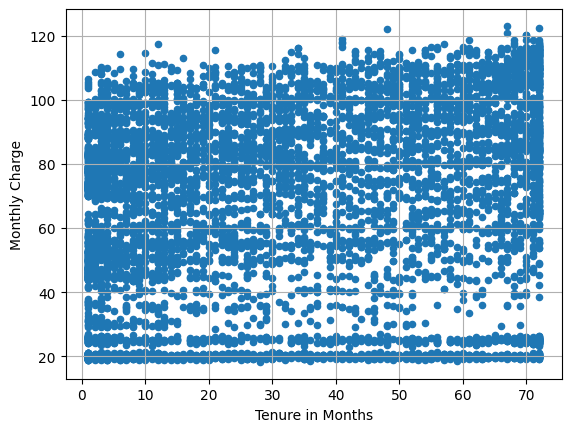

In [ ]:
#A plot of monthly charges over time, just to see if there's any relationship
df_final.plot(kind='scatter',x='Tenure in Months',y='Monthly Charge', grid=True)

#It appears that in general, customers' monthly charges go up over time
#While there are two groups of customers with low monthly charges ($20 & $30) that are stable over time

## 3. Principal Component Analysis (PCA)


In [ ]:
#Normalize the data
df_scaled = (df_final - df_final.mean())/df_final.std()
print(df_scaled.shape)


(7043, 53)


In [ ]:
#Perform the singular value decomposition
U, sigma, VT = svd(df_scaled, full_matrices=False)
Sigma = np.diag(sigma)
V = VT.T

#Check the decomposition
np.allclose(df_scaled, U@Sigma@V.T)

True

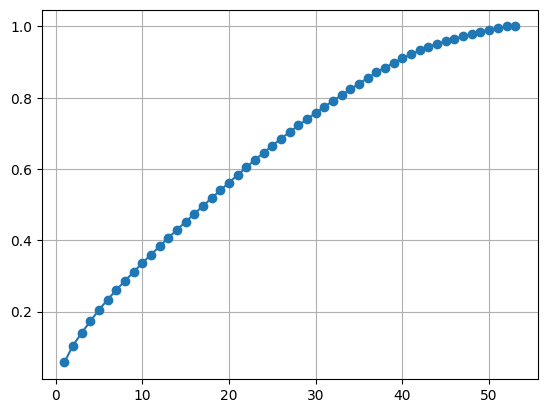

In [ ]:
#Calculate the cumulative variance ratio and plot it
cumulative_variance_ratio = np.cumsum(sigma)/sigma.sum()
plt.plot(np.arange(53)+1, cumulative_variance_ratio, marker='o')
plt.grid()

In [ ]:
#Identify how many principal components are necessary to retain 80% of the explained variance
percent_variance = sigma/sigma.sum()
max_variance = int((np.cumsum(percent_variance) < .8).sum())
print(f"Number of components needed to achieve at least 80% variance: {max_variance}")


Number of components needed to achieve at least 80% variance: 32


In [ ]:
#We have reduced from 53 to 32 components, which is still a lot but let's try it
#Perform PCA with the identified number of components
pca = PCA(n_components = max_variance, random_state=42)
#Extract the components and save them as an array
components = pca.fit_transform(df_scaled)
#Check the array
print(components.shape)

(7043, 32)


In [ ]:
#Check how much variance is explained by each component
#Looks like only the first three explain over 5% of variance, while the bulk are 2% or under
print(pca.explained_variance_ratio_)

[0.1334385  0.09287302 0.05075262 0.04492006 0.04170529 0.03384419
 0.03049119 0.02654733 0.02594871 0.02474629 0.0237028  0.02250792
 0.022223   0.02173123 0.02079886 0.02047008 0.02013944 0.0199299
 0.01966052 0.01922755 0.0188011  0.01861007 0.01820152 0.01662542
 0.01627741 0.01510789 0.01485867 0.01355468 0.01280318 0.01257561
 0.01192684 0.01151469]


In [ ]:
#Re-do PCA with just three components
#Perform PCA with the identified number of components
pca3 = PCA(n_components = 3, random_state=42)
#Extract the components
components3 = pca3.fit_transform(df_scaled)
#Check the array
print(components3.shape)

(7043, 3)


In [ ]:
#Check how much variance is explained by each component
#Now there are just three components explaining about 28% of variance
print(pca3.explained_variance_ratio_)

[0.1334385  0.09287302 0.05075239]


## 4. K-Means Clustering

First I compared clustering on the PCA results with 32 components vs PCA results with 3 components and found that the elbow plot was more clear with fewer principal components.

In [ ]:
#First k-means clustering using the PCA output array with 32 components
#Finding the appropriate number of clusters by computing the sum of squared error (SSE), or inertia, for a range of clusters
#Set the initial cluster centroid to 'k-means++' to optimize initial locations
inertias = []
for i in range(1, 11):
    kmeans_ = KMeans(n_clusters = i, init='k-means++', random_state=42).fit(components)
    inertias.append(kmeans_.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

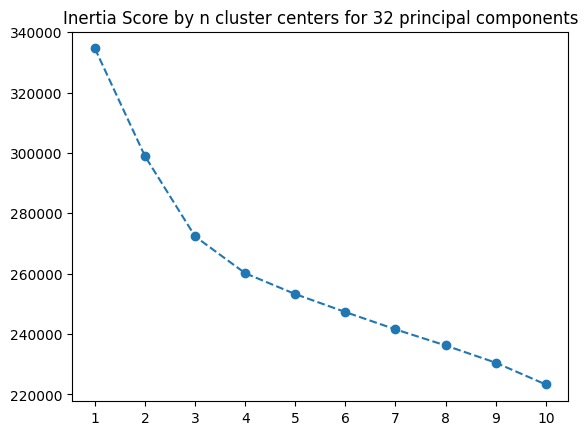

In [ ]:
#Plot the inertias
plt.plot(list(range(1, 11)), inertias, '--o')
plt.xticks(list(range(1, 11)), list(range(1, 11)))
plt.title('Inertia Score by n cluster centers for 32 principal components');

In [ ]:
#The elbow plot does not have a very clear elbow, but I am trying 4 clusters for kmeans clustering first
kmeans = KMeans(n_clusters=4, init='k-means++').fit(components)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Add the cluster labels to the dataframe and check
df_final['cluster'] = kmeans.labels_
df_final.tail()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Churn Category_Dissatisfaction,Churn Category_None,Churn Category_Other,Churn Category_Price,Customer Satisfaction_2.0,Customer Satisfaction_3.0,Customer Satisfaction_4.0,Customer Satisfaction_5.0,Customer Satisfaction_None,cluster
7038,0,0,72,1,22.77,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7039,1,1,24,1,36.05,1,1,24,1,0,...,0,1,0,0,0,0,0,0,1,1
7040,1,4,72,1,29.66,1,1,59,0,1,...,0,1,0,0,0,0,1,0,0,1
7041,1,1,11,0,0.00,0,1,17,1,0,...,0,1,0,0,0,0,0,0,1,3
7042,0,0,66,1,30.96,0,1,11,1,0,...,0,1,0,0,0,0,0,0,1,1


In [ ]:
#Check how many customers are in each segment
df_final.groupby('cluster').count()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_None,Churn Category_Other,Churn Category_Price,Customer Satisfaction_2.0,Customer Satisfaction_3.0,Customer Satisfaction_4.0,Customer Satisfaction_5.0,Customer Satisfaction_None
cluster,,,,,,,,,,,,,,,,,,,,,
0,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,...,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518
1,1946,1946,1946,1946,1946,1946,1946,1946,1946,1946,...,1946,1946,1946,1946,1946,1946,1946,1946,1946,1946
2,1547,1547,1547,1547,1547,1547,1547,1547,1547,1547,...,1547,1547,1547,1547,1547,1547,1547,1547,1547,1547
3,2032,2032,2032,2032,2032,2032,2032,2032,2032,2032,...,2032,2032,2032,2032,2032,2032,2032,2032,2032,2032


In [ ]:
#import a new table viewing tool to see more of my 53 columns
from google.colab import data_table
data_table.enable_dataframe_formatter()


In [ ]:
#Look at key characteristics for each customer segment
#Note there are distinct differences between clusters for key variables like Phone and Internet Service, Monthly Charge, and Churn Category
df_final.groupby('cluster').mean()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Churn Category_None,Churn Category_Other,Churn Category_Price,Customer Satisfaction_2.0,Customer Satisfaction_3.0,Customer Satisfaction_4.0,Customer Satisfaction_5.0,Customer Satisfaction_None,cluster3,cluster4
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.456522,2.185112,30.736495,1.000000,24.993248,0.224638,0.000000,0.000000,0.000000,0.000000,...,0.930830,0.001318,0.023057,0.002635,0.088274,0.058630,0.059947,0.785244,1.005270,1.000000
1,0.728160,3.452724,58.559096,0.952724,25.608541,0.717369,1.000000,28.578109,0.576567,0.700411,...,0.911100,0.006680,0.010791,0.003597,0.123844,0.073998,0.029291,0.756423,1.847893,1.998972
2,0.297996,0.452489,14.127990,0.906917,22.827957,0.453135,0.994829,24.935359,0.124758,0.248222,...,0.009050,0.115708,0.096962,0.122172,0.073691,0.000646,0.000646,0.614092,2.727860,0.080155
3,0.320374,1.481791,22.455709,0.780512,19.001521,0.262303,1.000000,26.818898,0.346457,0.335630,...,0.971457,0.002953,0.002461,0.000000,0.091535,0.071850,0.048228,0.784941,1.062992,0.473425


In [ ]:
# create a plotly express scatter plot to show the clusters for first two PCA components
fig = px.scatter(x=components[:, 0], y=components[:, 1], color=kmeans.labels_, title='4 Clusters of Customers using 32 principal components')
fig.update_xaxes(title_text='Principal Component 1')
fig.update_yaxes(title_text='Principal Component 2')
fig.show()

In [ ]:
# create a plotly express scatter plot to show the clusters for first three PCA components
fig = px.scatter_3d(x=components[:, 0], y=components[:, 1], z=components[:, 2], color=kmeans.labels_, title='Clusters of Customers using 32 principal components')

fig.update_layout(
    title='4 Clusters of customers using 32 principal components',
    autosize=True,
    width=800,
    height=700,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title='PCA1',
        yaxis_title='PCA2',
        zaxis_title='PCA3',
    ),
)

fig.show()

In [ ]:
#Now k-means clustering using the PCA output array with only 3 components
#First finding the appropriate number of clusters by computing the sum of squared error (SSE), or inertia, for a range of clusters
#Set the initial cluster centroid to 'k-means++' to optimize initial locations
inertias3 = []
for i in range(1, 11):
    kmeans_ = KMeans(n_clusters = i, init='k-means++', random_state=42).fit(components3)
    inertias3.append(kmeans_.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

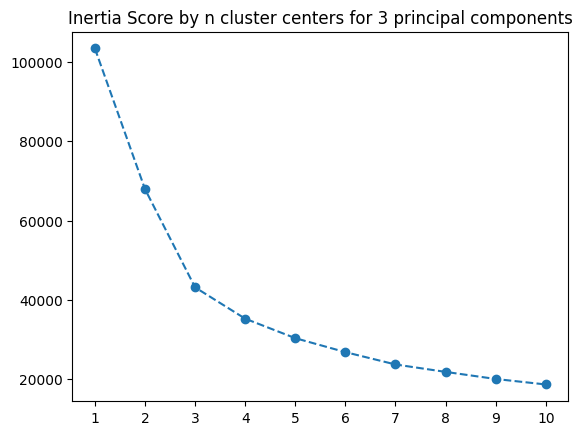

In [ ]:
#Plot the inertias
#This plot has a more distinct elbow at 3 clusters, but I am going to try 4 clusters first, for the sake of comparison
plt.plot(list(range(1, 11)), inertias3, '--o')
plt.xticks(list(range(1, 11)), list(range(1, 11)))
plt.title('Inertia Score by n cluster centers for 3 principal components');

In [ ]:
#Repeat k-means clustering with 4 clusters, using PCA output array with 3 components
kmeans3 = KMeans(n_clusters=4, init='k-means++').fit(components3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Add the cluster labels to the dataframe and check
df_final['cluster3'] = kmeans3.labels_
df_final.tail()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Churn Category_None,Churn Category_Other,Churn Category_Price,Customer Satisfaction_2.0,Customer Satisfaction_3.0,Customer Satisfaction_4.0,Customer Satisfaction_5.0,Customer Satisfaction_None,cluster,cluster3
7038,0,0,72,1,22.77,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
7039,1,1,24,1,36.05,1,1,24,1,0,...,1,0,0,0,0,0,0,1,1,2
7040,1,4,72,1,29.66,1,1,59,0,1,...,1,0,0,0,0,1,0,0,1,2
7041,1,1,11,0,0.00,0,1,17,1,0,...,1,0,0,0,0,0,0,1,3,0
7042,0,0,66,1,30.96,0,1,11,1,0,...,1,0,0,0,0,0,0,1,1,2


In [ ]:
#Check the number of customers in each segment
#Note that the results have shifted, it looks like segments 1 and 2 have become more equally sized
df_final.groupby('cluster3').count()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Churn Category_Dissatisfaction,Churn Category_None,Churn Category_Other,Churn Category_Price,Customer Satisfaction_2.0,Customer Satisfaction_3.0,Customer Satisfaction_4.0,Customer Satisfaction_5.0,Customer Satisfaction_None,cluster
cluster3,,,,,,,,,,,,,,,,,,,,,
0,1534,1534,1534,1534,1534,1534,1534,1534,1534,1534,...,1534,1534,1534,1534,1534,1534,1534,1534,1534,1534
1,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,...,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531
2,1963,1963,1963,1963,1963,1963,1963,1963,1963,1963,...,1963,1963,1963,1963,1963,1963,1963,1963,1963,1963
3,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015


In [ ]:
# create a plotly express scatter plot to show the clusters for first two PCA components
#This blurring of segments 1 and 2 can be seen visually, as this plot shows the segments are less segregated than they were in the previous plot
#So the PCA output array with 32 components kept more information that was important for k-means clustering.
fig = px.scatter(x=components3[:, 0], y=components3[:, 1], color=kmeans3.labels_, title='4 Clusters of Customers using 3 principal components')
fig.update_xaxes(title_text='Principal Component 1')
fig.update_yaxes(title_text='Principal Component 2')
fig.show()

In [ ]:
# create a plotly express scatter plot to show the clusters for first three PCA components
fig = px.scatter_3d(x=components3[:, 0], y=components3[:, 1], z=components3[:, 2], color=kmeans3.labels_, title='4 Clusters of Customers using 3 principal components')

fig.update_layout(
    title='4 Clusters of customers using 3 principal components',
    autosize=True,
    width=800,
    height=700,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title='PCA1',
        yaxis_title='PCA2',
        zaxis_title='PCA3',
    ),
)

fig.show()

In [ ]:
#Now k-means clustering using the PCA output array with 32 components again, but with 3 clusters
kmeans4 = KMeans(n_clusters=3, init='k-means++').fit(components)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Add the cluster labels to the dataframe and check
df_final['cluster4'] = kmeans4.labels_
df_final.tail()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Churn Category_Other,Churn Category_Price,Customer Satisfaction_2.0,Customer Satisfaction_3.0,Customer Satisfaction_4.0,Customer Satisfaction_5.0,Customer Satisfaction_None,cluster,cluster3,cluster4
7038,0,0,72,1,22.77,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
7039,1,1,24,1,36.05,1,1,24,1,0,...,0,0,0,0,0,0,1,1,2,2
7040,1,4,72,1,29.66,1,1,59,0,1,...,0,0,0,0,1,0,0,1,2,2
7041,1,1,11,0,0.00,0,1,17,1,0,...,0,0,0,0,0,0,1,3,0,0
7042,0,0,66,1,30.96,0,1,11,1,0,...,0,0,0,0,0,0,1,1,2,2


In [ ]:
#Check the number of customers in each segment
#Note that there are only 3 clusters now
df_final.groupby('cluster4').count()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Churn Category_None,Churn Category_Other,Churn Category_Price,Customer Satisfaction_2.0,Customer Satisfaction_3.0,Customer Satisfaction_4.0,Customer Satisfaction_5.0,Customer Satisfaction_None,cluster,cluster3
cluster4,,,,,,,,,,,,,,,,,,,,,
0,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,...,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028
1,1536,1536,1536,1536,1536,1536,1536,1536,1536,1536,...,1536,1536,1536,1536,1536,1536,1536,1536,1536,1536
2,2479,2479,2479,2479,2479,2479,2479,2479,2479,2479,...,2479,2479,2479,2479,2479,2479,2479,2479,2479,2479


In [ ]:
#Look at key characteristics for each customer segment
#Note the distinct differences between clusters for key variables have become more blurry; there is no longer a segment for
df_final.groupby('cluster4').mean()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Churn Category_None,Churn Category_Other,Churn Category_Price,Customer Satisfaction_2.0,Customer Satisfaction_3.0,Customer Satisfaction_4.0,Customer Satisfaction_5.0,Customer Satisfaction_None,cluster,cluster3
cluster4,,,,,,,,,,,,,,,,,,,,,
0,0.253633,0.709709,15.332232,0.846764,20.947322,0.342140,1.00000,25.400264,0.205416,0.265192,...,0.497688,0.057464,0.048217,0.056473,0.082232,0.036988,0.026090,0.704425,2.510238,1.973580
1,0.458333,2.197917,30.545573,0.999349,24.982507,0.223958,0.00651,0.135417,0.000651,0.000651,...,0.926432,0.001953,0.024089,0.005208,0.087891,0.057943,0.060547,0.781901,0.029948,1.011068
2,0.705930,3.316660,54.359016,0.912465,24.162279,0.641791,1.00000,28.868092,0.563130,0.655506,...,0.905204,0.009278,0.011295,0.008471,0.117386,0.072207,0.030254,0.756353,1.407422,1.602662


In [ ]:
# create a plotly express scatter plot to show the clusters for first two PCA components
#This plot shows the segments are more segregated and distinct than they were in the previous plot with 4 clusters
#So the 3 cluster result is more clear segmentation the customers
fig = px.scatter(x=components[:, 0], y=components[:, 1], color=kmeans4.labels_, title='3 Clusters of Customers using 32 principal components')
fig.update_xaxes(title_text='Principal Component 1')
fig.update_yaxes(title_text='Principal Component 2')
fig.show()

In [ ]:
# create a plotly express scatter plot to show the clusters for first three PCA components
fig = px.scatter_3d(x=components[:, 0], y=components[:, 1], z=components[:, 2], color=kmeans4.labels_, title='Clusters of Customers using 3 principal components')

fig.update_layout(
    title='3 Clusters of customers using 3 principal components',
    autosize=True,
    width=800,
    height=700,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title='PCA1',
        yaxis_title='PCA2',
        zaxis_title='PCA3',
    ),
)

fig.show()

## In the end, I think the best segmentation results came from using the higher number of principal components and segments. We lost a lot of information when by only using 3 components and 3  clusters. For example, the 4th cluster was composed entirely of people who had phone but no internet service, an important and distinct segment. And one of the 4 clusters had a very high churn rate. So the marketing department could target the high-attrition segment for a retention campaign, and the low-value phone-only customers with upgrade offers. In the results with 3 segments, the characteristics were not so clear. So even though the plot looked nicer, it was over simplified into less distinctive segments and not as useful to the client.